In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import genextreme
from scipy.stats import gumbel_r
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
import xarray as xr
from datetime import datetime

C:\Users\Nurul Nabila Fadiyah\anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
datdir = 'D:\\[4] SEMESTER 8\\Bismillah TA\\DATA CH TAHUNAN\\'

### Hanya kategori P dan FF

In [3]:
boxplot_cape = pd.read_excel(datdir + "Data Boxplot Luas.xlsx", sheet_name="CAPE")
boxplot_cin  = pd.read_excel(datdir + "Data Boxplot Luas.xlsx", sheet_name="CIN")
boxplot_kindex  = pd.read_excel(datdir + "Data Boxplot Luas.xlsx", sheet_name="Kindex")
boxplot_tcwv  = pd.read_excel(datdir + "Data Boxplot Luas.xlsx", sheet_name="TCWV")
boxplot_sh  = pd.read_excel(datdir + "Data Boxplot Luas.xlsx", sheet_name="SH")
boxplot_rh  = pd.read_excel(datdir + "Data Boxplot Luas.xlsx", sheet_name="RH")
boxplot_ws  = pd.read_excel(datdir + "Data Boxplot Luas.xlsx", sheet_name="WS")
boxplot_lls  = pd.read_excel(datdir + "Data Boxplot Luas.xlsx", sheet_name="LLS")
boxplot_dls  = pd.read_excel(datdir + "Data Boxplot Luas.xlsx", sheet_name="DLS")

C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\1126264345.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\1126264345.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FF['Luas_Category'] = pd.cut(data_FF['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300

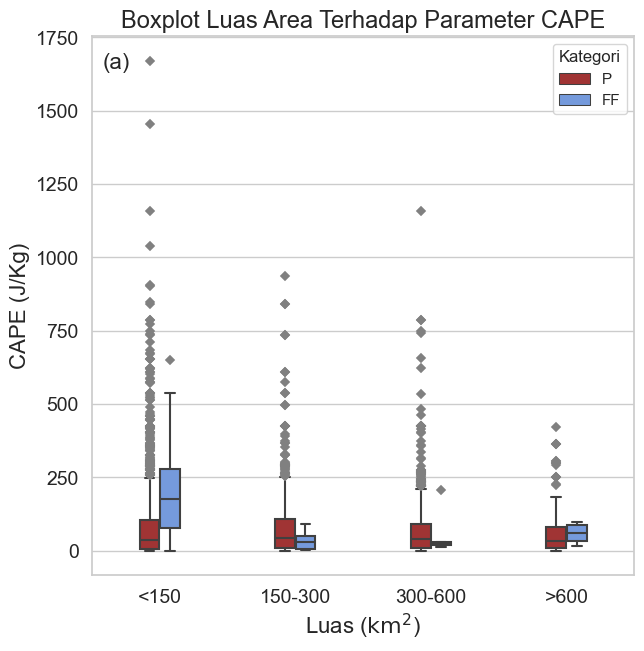

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "P"
data_P = boxplot_cape[boxplot_cape["Kategori"] == "P"]

# Filter data for category "FF"
data_FF = boxplot_cape[boxplot_cape["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF['Luas_Category'] = pd.cut(data_FF['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined = pd.concat([data_P, data_FF])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(7, 7))
bx_cape = seaborn.boxplot(x='Luas_Category', y='CAPE', hue='Kategori', data=data_combined,
                      palette={"P": "firebrick", "FF": "cornflowerblue"}, width=0.3, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2})

# Set labels and title
plt.xlabel("Luas ($\mathrm{km}^2$)", size=16)
plt.ylabel("CAPE (J/Kg)", size=16)
plt.title("Boxplot Luas Area Terhadap Parameter CAPE", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(a)', xy=(0.02, 0.94), xycoords='axes fraction', fontsize=16)

plt.xticks(fontsize=14)
bx_cape.set_yticklabels(bx_cape.get_yticklabels(), fontsize=14)

# Show the plot
plt.show()


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\2847118985.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P_cin['Luas_Category'] = pd.cut(data_P_cin['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\2847118985.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FF_cin['Luas_Category'] = pd.cut(data_FF_cin['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150',

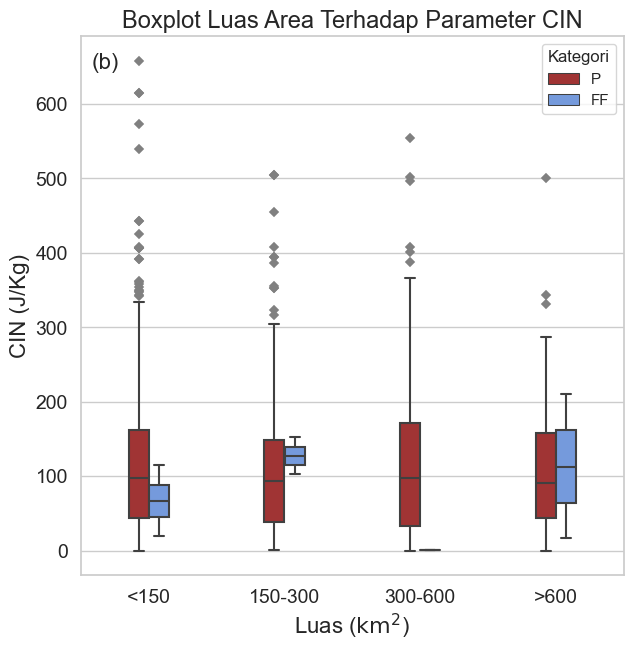

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "P"
data_P_cin = boxplot_cin[boxplot_cin["Kategori"] == "P"]

# Filter data for category "FF"
data_FF_cin = boxplot_cin[boxplot_cin["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_P_cin['Luas_Category'] = pd.cut(data_P_cin['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF_cin['Luas_Category'] = pd.cut(data_FF_cin['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined_cin = pd.concat([data_P_cin, data_FF_cin])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(7, 7))
bx_cin = seaborn.boxplot(x='Luas_Category', y='Cin', hue='Kategori', data=data_combined_cin,
                      palette={"P": "firebrick", "FF": "cornflowerblue"}, width=0.3, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2})

# Set labels and title
plt.xlabel("Luas ($\mathrm{km}^2$)", size=16)
plt.ylabel("CIN (J/Kg)", size=16)
plt.title("Boxplot Luas Area Terhadap Parameter CIN", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(b)', xy=(0.02, 0.94), xycoords='axes fraction', fontsize=16)

plt.xticks(fontsize=14)
bx_cin.set_yticklabels(bx_cin.get_yticklabels(), fontsize=14)

# Show the plot
plt.show()


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\4094899216.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P_kindex['Luas_Category'] = pd.cut(data_P_kindex['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\4094899216.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FF_kindex['Luas_Category'] = pd.cut(data_FF_kindex['Luas'], bins=[0, 150, 300, 600, float('inf')], lab

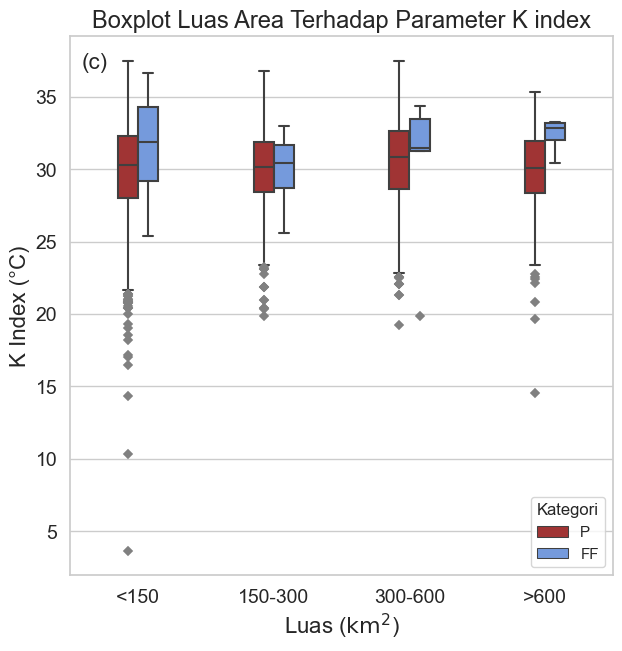

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "P"
data_P_kindex = boxplot_kindex[boxplot_kindex["Kategori"] == "P"]

# Filter data for category "FF"
data_FF_kindex = boxplot_kindex[boxplot_kindex["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_P_kindex['Luas_Category'] = pd.cut(data_P_kindex['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF_kindex['Luas_Category'] = pd.cut(data_FF_kindex['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined_kindex = pd.concat([data_P_kindex, data_FF_kindex])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(7, 7))
bx_kindex = seaborn.boxplot(x='Luas_Category', y='Kindex', hue='Kategori', data=data_combined_kindex,
                      palette={"P": "firebrick", "FF": "cornflowerblue"}, width=0.3, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2})

# Set labels and title
plt.xlabel("Luas ($\mathrm{km}^2$)", size=16)
plt.ylabel("K Index (°C)", size=16)
plt.title("Boxplot Luas Area Terhadap Parameter K index", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(c)', xy=(0.02, 0.94), xycoords='axes fraction', fontsize=16)

plt.xticks(fontsize=14)
bx_kindex.set_yticklabels(bx_kindex.get_yticklabels(), fontsize=14)

# Show the plot
plt.show()


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\1383503117.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P_tcwv['Luas_Category'] = pd.cut(data_P_tcwv['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\1383503117.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FF_tcwv['Luas_Category'] = pd.cut(data_FF_tcwv['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<1

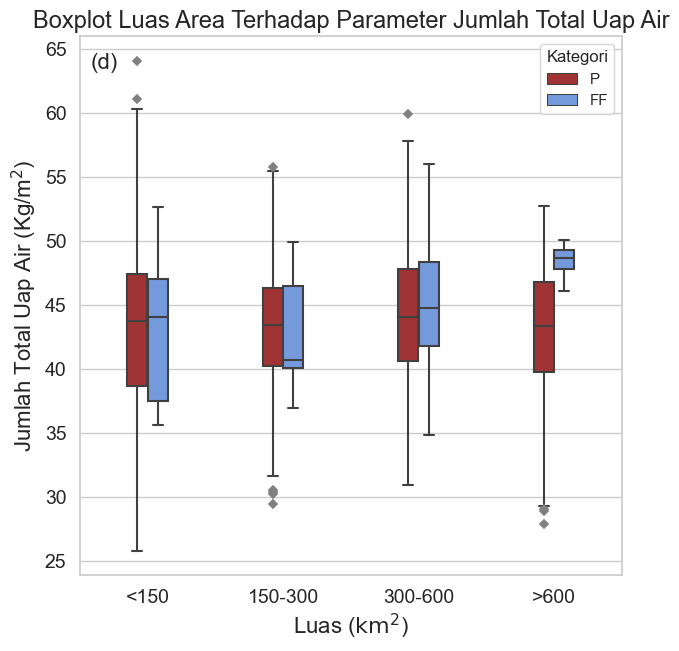

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "P"
data_P_tcwv = boxplot_tcwv[boxplot_tcwv["Kategori"] == "P"]

# Filter data for category "FF"
data_FF_tcwv = boxplot_tcwv[boxplot_tcwv["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_P_tcwv['Luas_Category'] = pd.cut(data_P_tcwv['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF_tcwv['Luas_Category'] = pd.cut(data_FF_tcwv['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined_tcwv = pd.concat([data_P_tcwv, data_FF_tcwv])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(7, 7))
bx_tcwv = seaborn.boxplot(x='Luas_Category', y='TCWV', hue='Kategori', data=data_combined_tcwv,
                      palette={"P": "firebrick", "FF": "cornflowerblue"}, width=0.3, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2})

# Set labels and title
plt.xlabel("Luas ($\mathrm{km}^2$)", size=16)
plt.ylabel("Jumlah Total Uap Air (Kg/m$^2$)", size=16)
plt.title("Boxplot Luas Area Terhadap Parameter Jumlah Total Uap Air", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(d)', xy=(0.02, 0.94), xycoords='axes fraction', fontsize=16)

plt.xticks(fontsize=14)
bx_tcwv.set_yticklabels(bx_tcwv.get_yticklabels(), fontsize=14)

# Show the plot
plt.show()


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\1163299394.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P_sh['Luas_Category'] = pd.cut(data_P_sh['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\1163299394.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FF_sh['Luas_Category'] = pd.cut(data_FF_sh['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '15

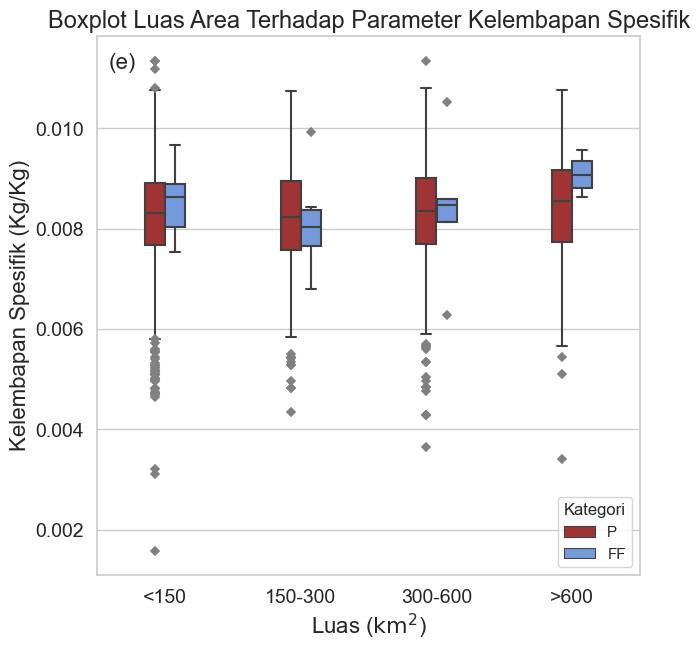

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "P"
data_P_sh = boxplot_sh[boxplot_sh["Kategori"] == "P"]

# Filter data for category "FF"
data_FF_sh = boxplot_sh[boxplot_sh["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_P_sh['Luas_Category'] = pd.cut(data_P_sh['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF_sh['Luas_Category'] = pd.cut(data_FF_sh['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined_sh = pd.concat([data_P_sh, data_FF_sh])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(7, 7))
bx_sh = seaborn.boxplot(x='Luas_Category', y='SH', hue='Kategori', data=data_combined_sh,
                      palette={"P": "firebrick", "FF": "cornflowerblue"}, width=0.3, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2})

# Set labels and title
plt.xlabel("Luas ($\mathrm{km}^2$)", size=16)
plt.ylabel("Kelembapan Spesifik (Kg/Kg)", size=16)
plt.title("Boxplot Luas Area Terhadap Parameter Kelembapan Spesifik", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(e)', xy=(0.02, 0.94), xycoords='axes fraction', fontsize=16)

plt.xticks(fontsize=14)
bx_sh.set_yticklabels(bx_sh.get_yticklabels(), fontsize=14)

# Show the plot
plt.show()


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\3683072468.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P_rh['Luas_Category'] = pd.cut(data_P_rh['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\3683072468.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FF_rh['Luas_Category'] = pd.cut(data_FF_rh['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '15

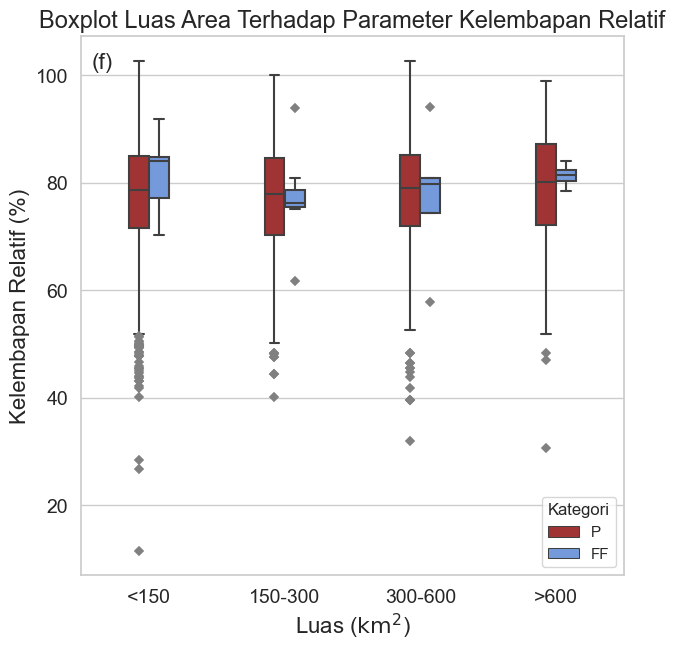

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "P"
data_P_rh = boxplot_rh[boxplot_rh["Kategori"] == "P"]

# Filter data for category "FF"
data_FF_rh = boxplot_rh[boxplot_rh["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_P_rh['Luas_Category'] = pd.cut(data_P_rh['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF_rh['Luas_Category'] = pd.cut(data_FF_rh['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined_rh = pd.concat([data_P_rh, data_FF_rh])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(7, 7))
bx_rh = seaborn.boxplot(x='Luas_Category', y='RH', hue='Kategori', data=data_combined_rh,
                      palette={"P": "firebrick", "FF": "cornflowerblue"}, width=0.3, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2})

# Set labels and title
plt.xlabel("Luas ($\mathrm{km}^2$)", size=16)
plt.ylabel("Kelembapan Relatif (%)", size=16)
plt.title("Boxplot Luas Area Terhadap Parameter Kelembapan Relatif", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(f)', xy=(0.02, 0.94), xycoords='axes fraction', fontsize=16)

plt.xticks(fontsize=14)
bx_rh.set_yticklabels(bx_rh.get_yticklabels(), fontsize=14)

# Show the plot
plt.show()


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\3425239776.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P_ws['Luas_Category'] = pd.cut(data_P_ws['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\3425239776.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FF_ws['Luas_Category'] = pd.cut(data_FF_ws['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '15

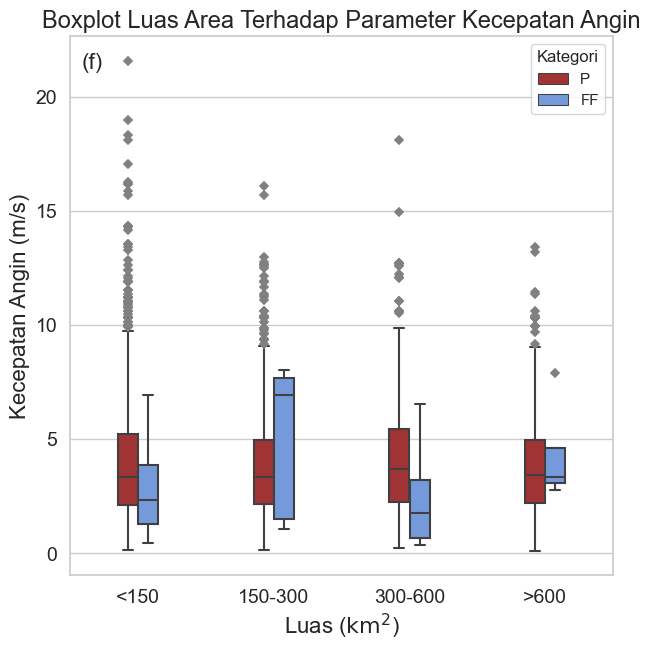

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "P"
data_P_ws = boxplot_ws[boxplot_ws["Kategori"] == "P"]

# Filter data for category "FF"
data_FF_ws = boxplot_ws[boxplot_ws["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_P_ws['Luas_Category'] = pd.cut(data_P_ws['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF_ws['Luas_Category'] = pd.cut(data_FF_ws['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined_ws = pd.concat([data_P_ws, data_FF_ws])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(7, 7))
bx_ws = seaborn.boxplot(x='Luas_Category', y='Windspeed', hue='Kategori', data=data_combined_ws,
                      palette={"P": "firebrick", "FF": "cornflowerblue"}, width=0.3, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2})

# Set labels and title
plt.xlabel("Luas ($\mathrm{km}^2$)", size=16)
plt.ylabel("Kecepatan Angin (m/s)", size=16)
plt.title("Boxplot Luas Area Terhadap Parameter Kecepatan Angin", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(f)', xy=(0.02, 0.94), xycoords='axes fraction', fontsize=16)

plt.xticks(fontsize=14)
bx_ws.set_yticklabels(bx_ws.get_yticklabels(), fontsize=14)

# Show the plot
plt.show()


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\2016703858.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P_lls['Luas_Category'] = pd.cut(data_P_lls['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\2016703858.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FF_lls['Luas_Category'] = pd.cut(data_FF_lls['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150',

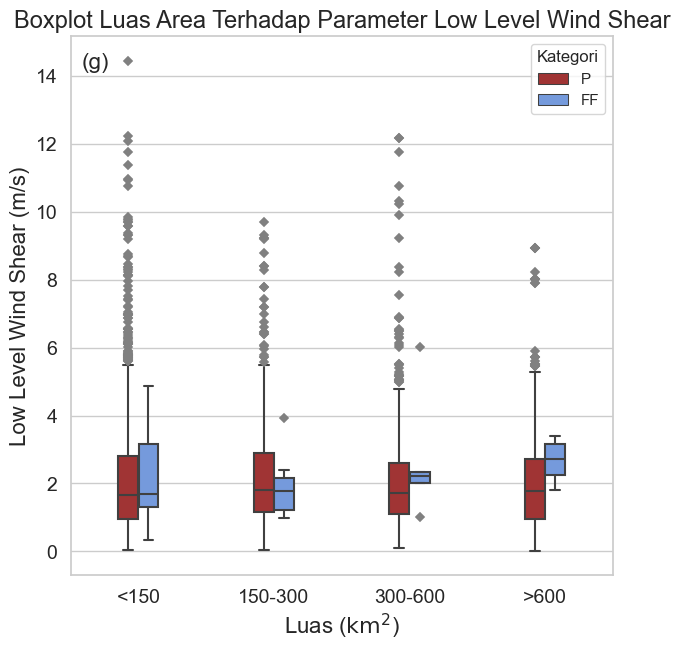

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "P"
data_P_lls = boxplot_lls[boxplot_lls["Kategori"] == "P"]

# Filter data for category "FF"
data_FF_lls = boxplot_lls[boxplot_lls["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_P_lls['Luas_Category'] = pd.cut(data_P_lls['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF_lls['Luas_Category'] = pd.cut(data_FF_lls['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined_lls = pd.concat([data_P_lls, data_FF_lls])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(7, 7))
bx_lls = seaborn.boxplot(x='Luas_Category', y='LLS', hue='Kategori', data=data_combined_lls,
                      palette={"P": "firebrick", "FF": "cornflowerblue"}, width=0.3, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2})

# Set labels and title
plt.xlabel("Luas ($\mathrm{km}^2$)", size=16)
plt.ylabel("Low Level Wind Shear (m/s)", size=16)
plt.title("Boxplot Luas Area Terhadap Parameter Low Level Wind Shear", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(g)', xy=(0.02, 0.94), xycoords='axes fraction', fontsize=16)

plt.xticks(fontsize=14)
bx_lls.set_yticklabels(bx_lls.get_yticklabels(), fontsize=14)

# Show the plot
plt.show()


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\3591215923.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P_dls['Luas_Category'] = pd.cut(data_P_dls['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_4180\3591215923.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FF_dls['Luas_Category'] = pd.cut(data_FF_dls['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150',

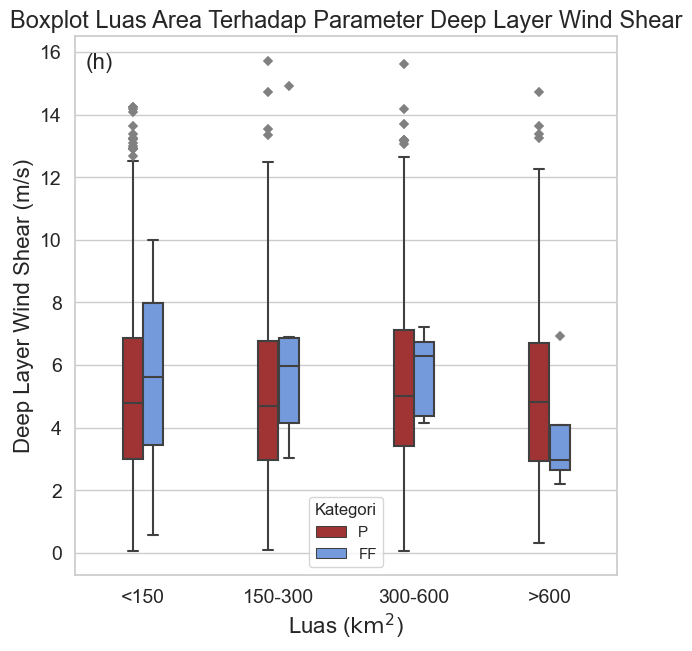

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "P"
data_P_dls = boxplot_dls[boxplot_dls["Kategori"] == "P"]

# Filter data for category "FF"
data_FF_dls = boxplot_dls[boxplot_dls["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_P_dls['Luas_Category'] = pd.cut(data_P_dls['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF_dls['Luas_Category'] = pd.cut(data_FF_dls['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined_dls = pd.concat([data_P_dls, data_FF_dls])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(7, 7))
bx_dls = seaborn.boxplot(x='Luas_Category', y='DLS', hue='Kategori', data=data_combined_dls,
                      palette={"P": "firebrick", "FF": "cornflowerblue"}, width=0.3, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2})

# Set labels and title
plt.xlabel("Luas ($\mathrm{km}^2$)", size=16)
plt.ylabel("Deep Layer Wind Shear (m/s)", size=16)
plt.title("Boxplot Luas Area Terhadap Parameter Deep Layer Wind Shear", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(h)', xy=(0.02, 0.94), xycoords='axes fraction', fontsize=16)

plt.xticks(fontsize=14)
bx_dls.set_yticklabels(bx_dls.get_yticklabels(), fontsize=14)

# Show the plot
plt.show()


### Semua Kategori

Buka semua data

In [4]:
titik_centroid = pd.read_excel(datdir + "data_centroid_1k_revisi.xlsx")
titik_centroid

,Longitude,Latitude,tanggal,Tanggal,Day,Month,Year,Date,Lokasi,Luas
0,100.499810,-0.865067,2012-07-24,24-7-2012,24,7,2012,2012-7-24,1,130.325204
1,100.494132,-0.868084,2015-05-14,14-5-2015,14,5,2015,2015-5-14,1,137.939508
2,100.270712,-0.457451,2012-07-24,24-7-2012,24,7,2012,2012-7-24,1,203.259681
3,100.270712,-0.457451,2018-10-12,10-12-2018,10,12,2018,2018-12-10,1,203.259681
4,100.184244,-0.312075,2021-09-01,9-1-2021,9,1,2021,2021-1-9,1,297.348634
...,...,...,...,...,...,...,...,...,...,...
88,98.083476,3.614369,2020-11-18,18-11-2020,18,11,2020,2020-11-18,1,149.727893
89,98.030312,3.673787,2016-05-29,29-5-2016,29,5,2016,2016-5-29,1,930.665319
90,100.463921,0.015869,2020-09-11,9-11-2020,9,11,2020,2020-11-9,1,267.451392
91,100.611108,0.043048,2011-01-28,28-1-2011,28,1,2011,2011-1-28,1,92.867611


In [5]:
cape_data            =xr.load_dataarray("D:\[4] SEMESTER 8\Bismillah TA\[7] Data Kondisi Atmosfer\cape_1121.nc")
cin_data             =xr.load_dataarray("D:\[4] SEMESTER 8\Bismillah TA\[7] Data Kondisi Atmosfer\cin_1121.nc")
kindex_data          =xr.load_dataarray("D:\[4] SEMESTER 8\Bismillah TA\[7] Data Kondisi Atmosfer\kindex_1121.nc")
specifichum_data     =xr.load_dataarray("D:\[4] SEMESTER 8\Bismillah TA\[7] Data Kondisi Atmosfer\specific_humidity1121.nc")

C:\Users\Nurul Nabila Fadiyah\anaconda3\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
C:\Users\Nurul Nabila Fadiyah\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [6]:
relativehum_data     =xr.load_dataarray("D:\\[4] SEMESTER 8\\Bismillah TA\\[7] Data Kondisi Atmosfer\\relative_humidity1121.nc")
twv_data             =xr.load_dataarray("D:\\[4] SEMESTER 8\\Bismillah TA\\[7] Data Kondisi Atmosfer\\totalwatervapour_1121.nc")

In [7]:
windspeed_data       =xr.load_dataarray("D:\[4] SEMESTER 8\Bismillah TA\[7] Data Kondisi Atmosfer\windspeed.nc")
lls_data            =xr.load_dataarray("D:\[4] SEMESTER 8\Bismillah TA\[7] Data Kondisi Atmosfer\LLS_Sumatra.nc")
dls_data             =xr.load_dataarray("D:\[4] SEMESTER 8\Bismillah TA\[7] Data Kondisi Atmosfer\DLS_Sumatra.nc")

In [8]:
print('Gabung Data CAPE')
centroid_lat = titik_centroid['Latitude'].values
centroid_lon = titik_centroid['Longitude'].values
centroid_luas = titik_centroid['Luas'].values

cape_lat = cape_data['latitude'].values
cape_lon = cape_data['longitude'].values

def find_idx(base, goal):
    idx = []
    for i in goal:
        idx.append(np.argmin(abs(base-i)))
    return idx

# Mencari index lat lon centroid di data cape
idx_lat = find_idx(cape_lat, centroid_lat)
idx_lon = find_idx(cape_lon, centroid_lon)

gabung_cape = np.array([])  # Data gabungan
luas_counter = 0  # Counter for Luas values

for n in range(len(idx_lat)):
    gabung_cape = np.append(gabung_cape, cape_data[:, idx_lat[n], idx_lon[n]])

    # Check if 96432 records have been added, then update Luas value
    if (n+1) % 96432 == 0:
        luas_counter += 1

# Create a Luas column with repeated values based on the luas_counter
luas_values = np.repeat(centroid_luas, 96432)
df_gabung_cape = pd.DataFrame({'CAPE': gabung_cape, 'Luas': luas_values})

# Add a Kategori column with "All" values
df_gabung_cape['Kategori'] = 'All'

# Display the updated DataFrame
print(df_gabung_cape)

Gabung Data CAPE
               CAPE        Luas Kategori
0         51.900391  130.325204      All
1         75.402344  130.325204      All
2         53.859375  130.325204      All
3         28.398438  130.325204      All
4          9.792969  130.325204      All
...             ...         ...      ...
8968171  102.820312   73.063062      All
8968172   86.173828   73.063062      All
8968173   71.486328   73.063062      All
8968174   37.212891   73.063062      All
8968175   24.482422   73.063062      All

[8968176 rows x 3 columns]


In [9]:
concat_cape = pd.concat([df_gabung_cape,boxplot_cape])
concat_cape

,CAPE,Luas,Kategori
0,51.900391,130.325204,All
1,75.402344,130.325204,All
2,53.859375,130.325204,All
3,28.398438,130.325204,All
4,9.792969,130.325204,All
...,...,...,...
3399,82.257812,746.181453,FF
3400,39.169922,816.309189,FF
3401,6.855469,185.956882,FF
3402,46.025391,267.451392,FF


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\4284937774.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\4284937774.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '3

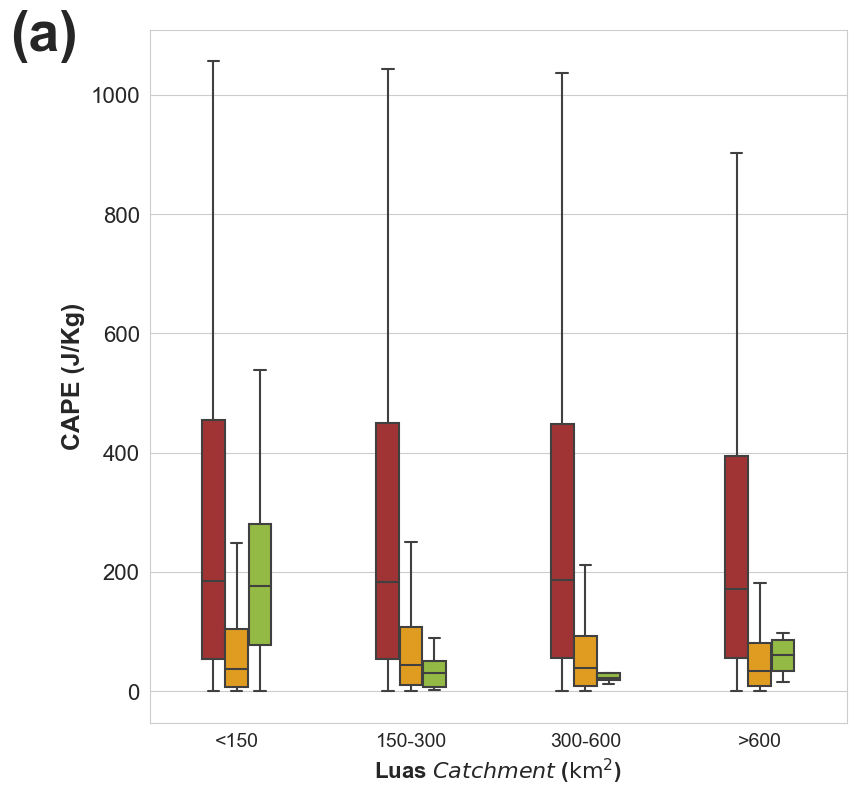

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "P"
data_All = concat_cape[concat_cape["Kategori"] == "All"]

# Filter data for category "P"
data_P = concat_cape[concat_cape["Kategori"] == "P"]

# Filter data for category "FF"
data_FF = concat_cape[concat_cape["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF['Luas_Category'] = pd.cut(data_FF['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined = pd.concat([data_All, data_P, data_FF])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(9, 9))
bx_cape = sns.boxplot(x='Luas_Category', y='CAPE', hue='Kategori', data=data_combined,
                      palette={"All": "firebrick", "P": "orange", "FF": "yellowgreen"}, width=0.4, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2},
                      showfliers=False)

# Set labels and title
plt.xlabel("Luas $\mathrm{\it{Catchment}}$ ($\mathrm{km}^2$)", size=16, fontweight='bold')
plt.ylabel("CAPE (J/Kg)", size=18, fontweight='bold')
# plt.title("Boxplot Luas Area Terhadap Parameter CAPE", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(a)', xy=(-0.20, 0.97), xycoords='axes fraction', fontsize=40, fontweight='bold')

plt.xticks(fontsize=14)
bx_cape.set_yticklabels(bx_cape.get_yticklabels(), fontsize=16)

# Remove the legend
bx_cape.legend_.remove()

# Show the plot
plt.show()


In [15]:
print('Gabung Data CIN')
centroid_lat = titik_centroid['Latitude'].values
centroid_lon = titik_centroid['Longitude'].values
centroid_luas = titik_centroid['Luas'].values

cin_lat = cin_data['latitude'].values
cin_lon = cin_data['longitude'].values

def find_idx(base, goal):
    idx = []
    for i in goal:
        idx.append(np.argmin(abs(base-i)))
    return idx

# Mencari index lat lon centroid di data cape
idx_lat = find_idx(cin_lat, centroid_lat)
idx_lon = find_idx(cin_lon, centroid_lon)

gabung_cin = np.array([])  # Data gabungan
luas_counter = 0  # Counter for Luas values

for n in range(len(idx_lat)):
    gabung_cin = np.append(gabung_cin, cin_data[:, idx_lat[n], idx_lon[n]])

    # Check if 96432 records have been added, then update Luas value
    if (n+1) % 96432 == 0:
        luas_counter += 1

# Create a Luas column with repeated values based on the luas_counter
luas_values = np.repeat(centroid_luas, 96432)
df_gabung_cin = pd.DataFrame({'Cin': gabung_cin, 'Luas': luas_values})

# Add a Kategori column with "All" values
df_gabung_cin['Kategori'] = 'All'

# Display the updated DataFrame
print(df_gabung_cin)

Gabung Data CIN
                Cin        Luas Kategori
0               NaN  130.325204      All
1        262.430237  130.325204      All
2        161.474396  130.325204      All
3               NaN  130.325204      All
4               NaN  130.325204      All
...             ...         ...      ...
8968171         NaN   73.063062      All
8968172         NaN   73.063062      All
8968173         NaN   73.063062      All
8968174         NaN   73.063062      All
8968175         NaN   73.063062      All

[8968176 rows x 3 columns]


In [16]:
print('Gabung Data CIN')
centroid_lat = titik_centroid['Latitude'].values
centroid_lon = titik_centroid['Longitude'].values
centroid_luas = titik_centroid['Luas'].values

cin_lat = cin_data['latitude'].values
cin_lon = cin_data['longitude'].values

def find_idx(base, goal):
    idx = []
    for i in goal:
        idx.append(np.argmin(abs(base-i)))
    return idx

# Mencari index lat lon centroid di data cin
idx_lat = find_idx(cin_lat, centroid_lat)
idx_lon = find_idx(cin_lon, centroid_lon)

gabung_cin = np.array([])  # Data gabungan
luas_counter = 0  # Counter for Luas values

for n in range(len(idx_lat)):
    gabung_cin = np.append(gabung_cin, cin_data[:, idx_lat[n], idx_lon[n]])

    # Check if 96432 records have been added, then update Luas value
    if (n+1) % 96432 == 0:
        luas_counter += 1

# Create a Luas column with repeated values based on the luas_counter
luas_values = np.repeat(centroid_luas, 96432)
df_gabung_cin = pd.DataFrame({'Cin': gabung_cin, 'Luas': luas_values})

# Add a Kategori column with "All" values
df_gabung_cin['Kategori'] = 'All'

# Remove rows with NaN values
df_gabung_cin = df_gabung_cin.dropna()

# Display the updated DataFrame
print(df_gabung_cin)


Gabung Data CIN
                Cin        Luas Kategori
1        262.430237  130.325204      All
2        161.474396  130.325204      All
7        551.549011  130.325204      All
8        360.547791  130.325204      All
9        264.764893  130.325204      All
...             ...         ...      ...
8968162   51.134064   73.063062      All
8968163    4.760925   73.063062      All
8968164   10.895172   73.063062      All
8968165    4.074249   73.063062      All
8968166    6.317383   73.063062      All

[4852956 rows x 3 columns]


In [17]:
concat_cin = pd.concat([df_gabung_cin,boxplot_cin])
concat_cin

,Cin,Luas,Kategori
1,262.430237,130.325204,All
2,161.474396,130.325204,All
7,551.549011,130.325204,All
8,360.547791,130.325204,All
9,264.764893,130.325204,All
...,...,...,...
920,92.502140,71.595566,FF
921,41.780090,69.471854,FF
922,114.338300,99.781486,FF
923,112.369800,816.309189,FF


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\3867782959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\3867782959.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '3

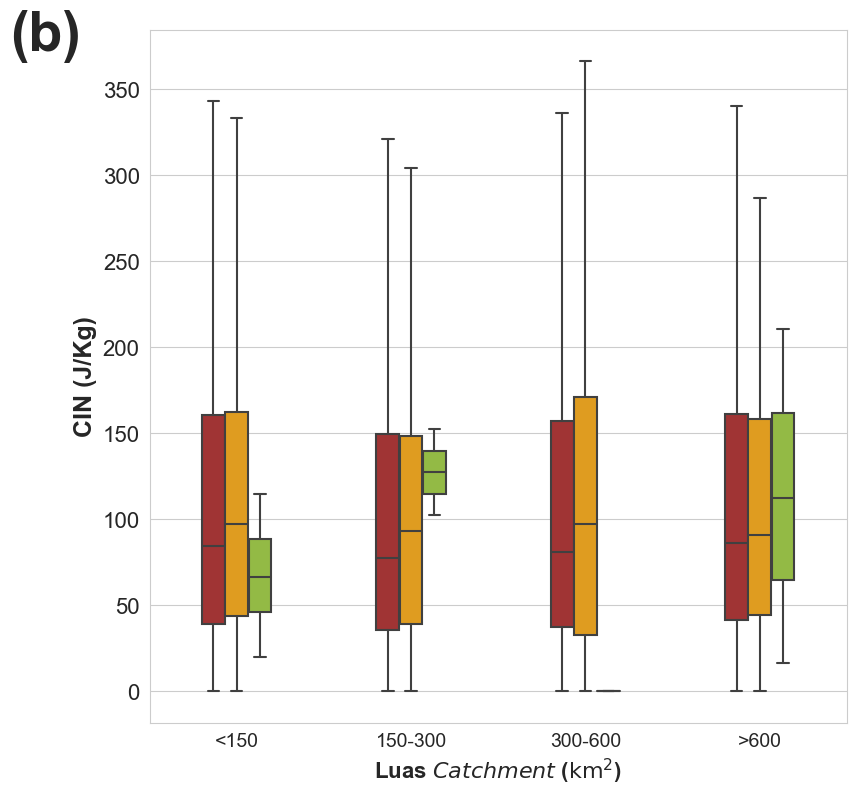

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "P"
data_All = concat_cin[concat_cin["Kategori"] == "All"]

# Filter data for category "P"
data_P = concat_cin[concat_cin["Kategori"] == "P"]

# Filter data for category "FF"
data_FF = concat_cin[concat_cin["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF['Luas_Category'] = pd.cut(data_FF['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined = pd.concat([data_All, data_P, data_FF])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(9, 9))
bx_cin = sns.boxplot(x='Luas_Category', y='Cin', hue='Kategori', data=data_combined,
                      palette={"All": "firebrick", "P": "orange", "FF": "yellowgreen"}, width=0.4, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2},
                      showfliers=False)

# Set labels and title
plt.xlabel("Luas $\mathrm{\it{Catchment}}$ ($\mathrm{km}^2$)", size=16, fontweight='bold')
plt.ylabel("CIN (J/Kg)", size=18, fontweight='bold')
# plt.title("Boxplot Luas Area Terhadap Parameter CIN", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(b)', xy=(-0.20, 0.97), xycoords='axes fraction', fontsize=40, fontweight='bold')

plt.xticks(fontsize=14)
bx_cin.set_yticklabels(bx_cin.get_yticklabels(), fontsize=16)

# Remove the legend
bx_cin.legend_.remove()

# Show the plot
plt.show()


In [21]:
print('Gabung Data CIN')
centroid_lat = titik_centroid['Latitude'].values
centroid_lon = titik_centroid['Longitude'].values
centroid_luas = titik_centroid['Luas'].values

kindex_lat = kindex_data['latitude'].values
kindex_lon = kindex_data['longitude'].values

def find_idx(base, goal):
    idx = []
    for i in goal:
        idx.append(np.argmin(abs(base-i)))
    return idx

# Mencari index lat lon centroid di data cape
idx_lat = find_idx(kindex_lat, centroid_lat)
idx_lon = find_idx(kindex_lon, centroid_lon)

gabung_kindex = np.array([])  # Data gabungan
luas_counter = 0  # Counter for Luas values

for n in range(len(idx_lat)):
    gabung_kindex = np.append(gabung_kindex, kindex_data[:, idx_lat[n], idx_lon[n]])

    # Check if 96432 records have been added, then update Luas value
    if (n+1) % 96432 == 0:
        luas_counter += 1

# Create a Luas column with repeated values based on the luas_counter
luas_values = np.repeat(centroid_luas, 96432)
df_gabung_kindex = pd.DataFrame({'Kindex': gabung_kindex, 'Luas': luas_values})

# Add a Kategori column with "All" values
df_gabung_kindex['Kategori'] = 'All'

# Display the updated DataFrame
print(df_gabung_kindex)

Gabung Data CIN
            Kindex        Luas Kategori
0        20.327469  130.325204      All
1        19.778484  130.325204      All
2        19.214573  130.325204      All
3        19.055351  130.325204      All
4        18.925983  130.325204      All
...            ...         ...      ...
8968171  33.980770   73.063062      All
8968172  33.612572   73.063062      All
8968173  33.287491   73.063062      All
8968174  33.428471   73.063062      All
8968175  33.464958   73.063062      All

[8968176 rows x 3 columns]


In [22]:
concat_kindex = pd.concat([df_gabung_kindex,boxplot_kindex])
concat_kindex

,Kindex,Luas,Kategori
0,20.327469,130.325204,All
1,19.778484,130.325204,All
2,19.214573,130.325204,All
3,19.055351,130.325204,All
4,18.925983,130.325204,All
...,...,...,...
3399,30.456320,746.181453,FF
3400,33.237740,816.309189,FF
3401,32.970710,185.956882,FF
3402,31.199360,267.451392,FF


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\231741385.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\231741385.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300

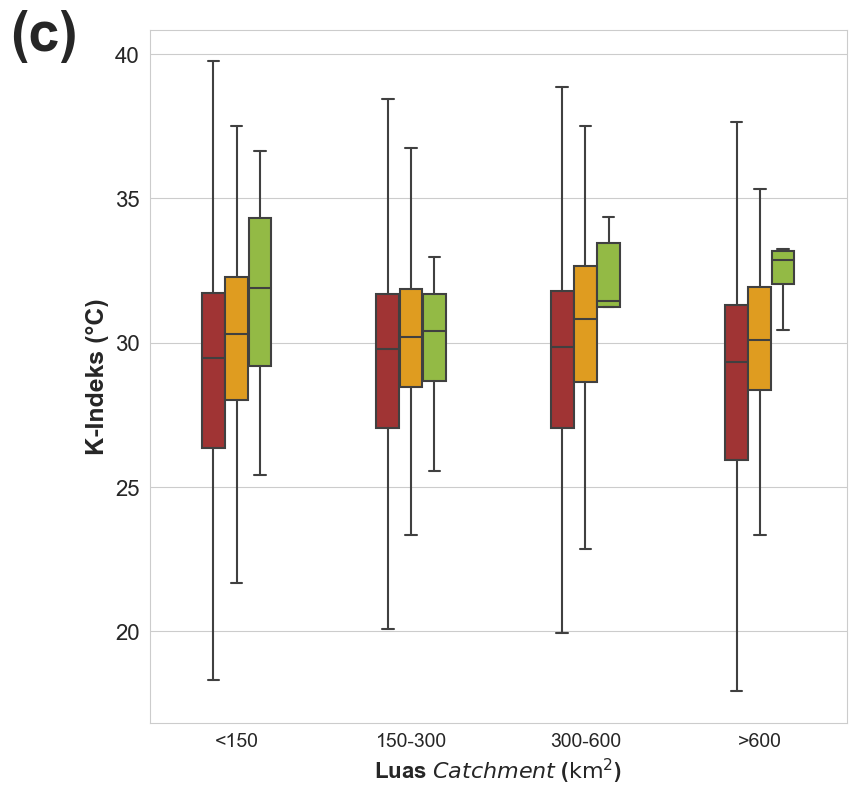

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "All"
data_All = concat_kindex[concat_kindex["Kategori"] == "All"]

# Filter data for category "P"
data_P = concat_kindex[concat_kindex["Kategori"] == "P"]

# Filter data for category "FF"
data_FF = concat_kindex[concat_kindex["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF['Luas_Category'] = pd.cut(data_FF['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined = pd.concat([data_All, data_P, data_FF])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(9, 9))
bx_kindex = sns.boxplot(x='Luas_Category', y='Kindex', hue='Kategori', data=data_combined,
                      palette={"All": "firebrick", "P": "orange", "FF": "yellowgreen"}, width=0.4, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2},
                      showfliers=False)

# Set labels and title
plt.xlabel("Luas $\mathrm{\it{Catchment}}$ ($\mathrm{km}^2$)", size=16, fontweight='bold')
plt.ylabel("K-Indeks (°C)", size=18, fontweight='bold')
# plt.title("Boxplot Luas Area Terhadap Parameter K index", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(c)', xy=(-0.20, 0.97), xycoords='axes fraction', fontsize=40, fontweight='bold')

plt.xticks(fontsize=14)
bx_kindex.set_yticklabels(bx_kindex.get_yticklabels(), fontsize=16)

# Remove the legend
bx_kindex.legend_.remove()

# Show the plot
plt.show()


In [24]:
print('Gabung Data TCWV')
centroid_lat = titik_centroid['Latitude'].values
centroid_lon = titik_centroid['Longitude'].values
centroid_luas = titik_centroid['Luas'].values

tcwv_lat = twv_data['latitude'].values
tcwv_lon = twv_data['longitude'].values

def find_idx(base, goal):
    idx = []
    for i in goal:
        idx.append(np.argmin(abs(base-i)))
    return idx

# Mencari index lat lon centroid di data cape
idx_lat = find_idx(tcwv_lat, centroid_lat)
idx_lon = find_idx(tcwv_lon, centroid_lon)

gabung_tcwv = np.array([])  # Data gabungan
luas_counter = 0  # Counter for Luas values

for n in range(len(idx_lat)):
    gabung_tcwv = np.append(gabung_tcwv, twv_data[:, idx_lat[n], idx_lon[n]])

    # Check if 96432 records have been added, then update Luas value
    if (n+1) % 96432 == 0:
        luas_counter += 1

# Create a Luas column with repeated values based on the luas_counter
luas_values = np.repeat(centroid_luas, 96432)
df_gabung_tcwv = pd.DataFrame({'TCWV': gabung_tcwv, 'Luas': luas_values})

# Add a Kategori column with "All" values
df_gabung_tcwv['Kategori'] = 'All'

# Display the updated DataFrame
print(df_gabung_tcwv)

Gabung Data TCWV
              TCWV        Luas Kategori
0        34.783253  130.325204      All
1        34.428810  130.325204      All
2        34.448502  130.325204      All
3        34.567741  130.325204      All
4        34.933125  130.325204      All
...            ...         ...      ...
8968171  53.406876   73.063062      All
8968172  52.612659   73.063062      All
8968173  51.823914   73.063062      All
8968174  49.558315   73.063062      All
8968175  48.415123   73.063062      All

[8968176 rows x 3 columns]


In [25]:
concat_tcwv = pd.concat([df_gabung_tcwv,boxplot_tcwv])
concat_tcwv

,TCWV,Luas,Kategori
0,34.783253,130.325204,All
1,34.428810,130.325204,All
2,34.448502,130.325204,All
3,34.567741,130.325204,All
4,34.933125,130.325204,All
...,...,...,...
3399,48.344020,746.181453,FF
3400,49.041970,816.309189,FF
3401,48.958820,185.956882,FF
3402,44.017390,267.451392,FF


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\1186651192.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\1186651192.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '3

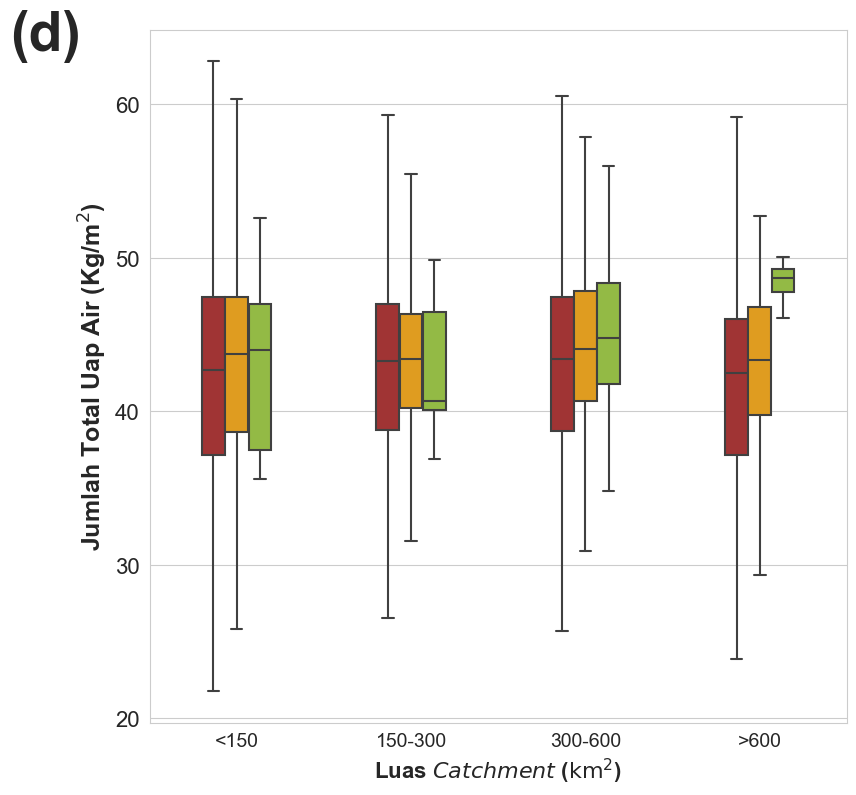

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "All"
data_All = concat_tcwv[concat_tcwv["Kategori"] == "All"]

# Filter data for category "P"
data_P = concat_tcwv[concat_tcwv["Kategori"] == "P"]

# Filter data for category "FF"
data_FF = concat_tcwv[concat_tcwv["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF['Luas_Category'] = pd.cut(data_FF['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined = pd.concat([data_All, data_P, data_FF])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(9, 9))
bx_tcwv = sns.boxplot(x='Luas_Category', y='TCWV', hue='Kategori', data=data_combined,
                      palette={"All": "firebrick", "P": "orange", "FF": "yellowgreen"}, width=0.4, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2},
                      showfliers=False)

# Set labels and title
plt.xlabel("Luas $\mathrm{\it{Catchment}}$ ($\mathrm{km}^2$)", size=16, fontweight='bold')
plt.ylabel("Jumlah Total Uap Air (Kg/m$^2$)", size=18, fontweight='bold')
# plt.title("Boxplot Luas Area Terhadap Parameter Jumlah Total Uap Air", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(d)', xy=(-0.20, 0.97), xycoords='axes fraction', fontsize=40, fontweight='bold')

plt.xticks(fontsize=14)
bx_tcwv.set_yticklabels(bx_tcwv.get_yticklabels(), fontsize=16)

# Remove the legend
bx_tcwv.legend_.remove()

# Show the plot
plt.show()


In [28]:
print('Gabung Data TCWV')
centroid_lat = titik_centroid['Latitude'].values
centroid_lon = titik_centroid['Longitude'].values
centroid_luas = titik_centroid['Luas'].values

sh_lat = specifichum_data['latitude'].values
sh_lon = specifichum_data['longitude'].values

def find_idx(base, goal):
    idx = []
    for i in goal:
        idx.append(np.argmin(abs(base-i)))
    return idx

# Mencari index lat lon centroid di data cape
idx_lat = find_idx(sh_lat, centroid_lat)
idx_lon = find_idx(sh_lon, centroid_lon)

gabung_sh = np.array([])  # Data gabungan
luas_counter = 0  # Counter for Luas values

for n in range(len(idx_lat)):
    gabung_sh = np.append(gabung_sh, specifichum_data[:, idx_lat[n], idx_lon[n]])

    # Check if 96432 records have been added, then update Luas value
    if (n+1) % 96432 == 0:
        luas_counter += 1

# Create a Luas column with repeated values based on the luas_counter
luas_values = np.repeat(centroid_luas, 96432)
df_gabung_sh = pd.DataFrame({'SH': gabung_sh, 'Luas': luas_values})

# Add a Kategori column with "All" values
df_gabung_sh['Kategori'] = 'All'

# Display the updated DataFrame
print(df_gabung_sh)

Gabung Data TCWV
               SH        Luas Kategori
0        0.004850  130.325204      All
1        0.004730  130.325204      All
2        0.004661  130.325204      All
3        0.004623  130.325204      All
4        0.004815  130.325204      All
...           ...         ...      ...
8968171  0.010295   73.063062      All
8968172  0.010149   73.063062      All
8968173  0.010029   73.063062      All
8968174  0.009670   73.063062      All
8968175  0.009141   73.063062      All

[8968176 rows x 3 columns]


In [29]:
concat_sh = pd.concat([df_gabung_sh,boxplot_sh])
concat_sh

,SH,Luas,Kategori
0,0.004850,130.325204,All
1,0.004730,130.325204,All
2,0.004661,130.325204,All
3,0.004623,130.325204,All
4,0.004815,130.325204,All
...,...,...,...
3399,0.008625,746.181453,FF
3400,0.008875,816.309189,FF
3401,0.009937,185.956882,FF
3402,0.007756,267.451392,FF


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\3099469325.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\3099469325.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '3

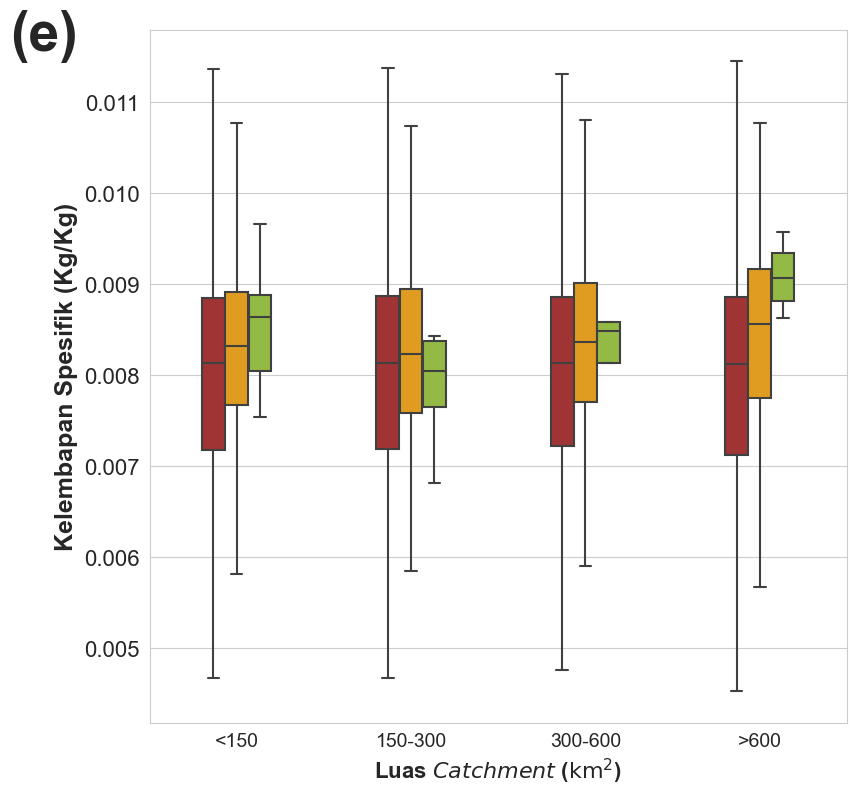

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "All"
data_All = concat_sh[concat_sh["Kategori"] == "All"]

# Filter data for category "P"
data_P = concat_sh[concat_sh["Kategori"] == "P"]

# Filter data for category "FF"
data_FF = concat_sh[concat_sh["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF['Luas_Category'] = pd.cut(data_FF['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined = pd.concat([data_All, data_P, data_FF])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(9, 9))
bx_sh = sns.boxplot(x='Luas_Category', y='SH', hue='Kategori', data=data_combined,
                      palette={"All": "firebrick", "P": "orange", "FF": "yellowgreen"}, width=0.4, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2},
                      showfliers=False)

# Set labels and title
plt.xlabel("Luas $\mathrm{\it{Catchment}}$ ($\mathrm{km}^2$)", size=16, fontweight='bold')
plt.ylabel("Kelembapan Spesifik (Kg/Kg)", size=18, fontweight='bold')
# plt.title("Boxplot Luas Area Terhadap Parameter Kelembapan Spesifik", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(e)', xy=(-0.20, 0.97), xycoords='axes fraction', fontsize=40, fontweight='bold')

plt.xticks(fontsize=14)
bx_sh.set_yticklabels(bx_sh.get_yticklabels(), fontsize=16)

# Remove the legend
bx_sh.legend_.remove()

# Show the plot
plt.show()


In [31]:
print('Gabung Data RH')
centroid_lat = titik_centroid['Latitude'].values
centroid_lon = titik_centroid['Longitude'].values
centroid_luas = titik_centroid['Luas'].values

rh_lat = relativehum_data['latitude'].values
rh_lon = relativehum_data['longitude'].values

def find_idx(base, goal):
    idx = []
    for i in goal:
        idx.append(np.argmin(abs(base-i)))
    return idx

# Mencari index lat lon centroid di data cape
idx_lat = find_idx(rh_lat, centroid_lat)
idx_lon = find_idx(rh_lon, centroid_lon)

gabung_rh = np.array([])  # Data gabungan
luas_counter = 0  # Counter for Luas values

for n in range(len(idx_lat)):
    gabung_rh = np.append(gabung_rh, relativehum_data[:, idx_lat[n], idx_lon[n]])

    # Check if 96432 records have been added, then update Luas value
    if (n+1) % 96432 == 0:
        luas_counter += 1

# Create a Luas column with repeated values based on the luas_counter
luas_values = np.repeat(centroid_luas, 96432)
df_gabung_rh = pd.DataFrame({'RH': gabung_rh, 'Luas': luas_values})

# Add a Kategori column with "All" values
df_gabung_rh['Kategori'] = 'All'

# Display the updated DataFrame
print(df_gabung_rh)

Gabung Data RH
                 RH        Luas Kategori
0         45.599541  130.325204      All
1         44.127151  130.325204      All
2         43.200768  130.325204      All
3         42.879707  130.325204      All
4         44.683388  130.325204      All
...             ...         ...      ...
8968171  101.362335   73.063062      All
8968172   99.386871   73.063062      All
8968173   97.438004   73.063062      All
8968174   96.673172   73.063062      All
8968175   89.515701   73.063062      All

[8968176 rows x 3 columns]


In [32]:
concat_rh = pd.concat([df_gabung_rh,boxplot_rh])
concat_rh

,RH,Luas,Kategori
0,45.599541,130.325204,All
1,44.127151,130.325204,All
2,43.200768,130.325204,All
3,42.879707,130.325204,All
4,44.683388,130.325204,All
...,...,...,...
3399,78.446170,746.181453,FF
3400,84.096480,816.309189,FF
3401,93.988100,185.956882,FF
3402,76.045360,267.451392,FF


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\1524054147.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\1524054147.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '3

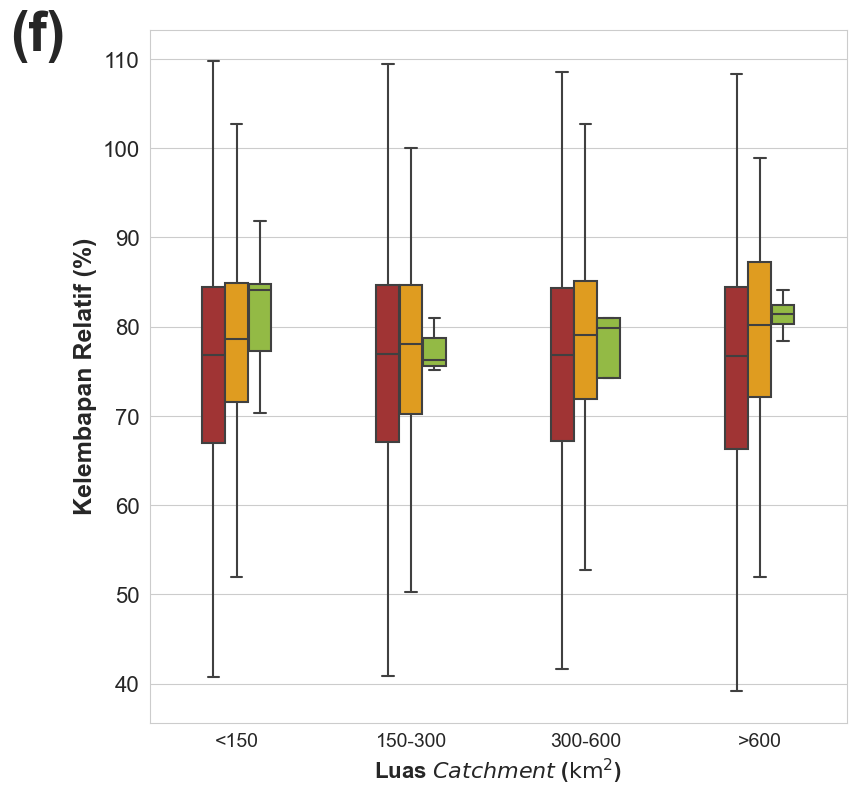

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "All"
data_All = concat_rh[concat_rh["Kategori"] == "All"]

# Filter data for category "P"
data_P = concat_rh[concat_rh["Kategori"] == "P"]

# Filter data for category "FF"
data_FF = concat_rh[concat_rh["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF['Luas_Category'] = pd.cut(data_FF['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined = pd.concat([data_All, data_P, data_FF])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(9, 9))
bx_rh = sns.boxplot(x='Luas_Category', y='RH', hue='Kategori', data=data_combined,
                      palette={"All": "firebrick", "P": "orange", "FF": "yellowgreen"}, width=0.4, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2},
                      showfliers=False)

# Set labels and title
plt.xlabel("Luas $\mathrm{\it{Catchment}}$ ($\mathrm{km}^2$)", size=16, fontweight='bold')
plt.ylabel("Kelembapan Relatif (%)", size=18, fontweight='bold')
# plt.title("Boxplot Luas Area Terhadap Parameter Kelembapan Relatif", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(f)', xy=(-0.20, 0.97), xycoords='axes fraction', fontsize=40, fontweight='bold')

plt.xticks(fontsize=14)
bx_rh.set_yticklabels(bx_rh.get_yticklabels(), fontsize=16)

# Remove the legend
bx_rh.legend_.remove()

# Show the plot
plt.show()


In [34]:
print('Gabung Data WS')
centroid_lat = titik_centroid['Latitude'].values
centroid_lon = titik_centroid['Longitude'].values
centroid_luas = titik_centroid['Luas'].values

ws_lat = windspeed_data['latitude'].values
ws_lon = windspeed_data['longitude'].values

def find_idx(base, goal):
    idx = []
    for i in goal:
        idx.append(np.argmin(abs(base-i)))
    return idx

# Mencari index lat lon centroid di data cape
idx_lat = find_idx(ws_lat, centroid_lat)
idx_lon = find_idx(ws_lon, centroid_lon)

gabung_ws = np.array([])  # Data gabungan
luas_counter = 0  # Counter for Luas values

for n in range(len(idx_lat)):
    gabung_ws = np.append(gabung_ws, windspeed_data[:, idx_lat[n], idx_lon[n]])

    # Check if 96432 records have been added, then update Luas value
    if (n+1) % 96432 == 0:
        luas_counter += 1

# Create a Luas column with repeated values based on the luas_counter
luas_values = np.repeat(centroid_luas, 96432)
df_gabung_ws = pd.DataFrame({'Windspeed': gabung_ws, 'Luas': luas_values})

# Add a Kategori column with "All" values
df_gabung_ws['Kategori'] = 'All'

# Display the updated DataFrame
print(df_gabung_ws)

Gabung Data WS
         Windspeed        Luas Kategori
0        10.963670  130.325204      All
1        10.039498  130.325204      All
2         9.587006  130.325204      All
3         9.615642  130.325204      All
4         9.489677  130.325204      All
...            ...         ...      ...
8968171   2.763391   73.063062      All
8968172   3.630297   73.063062      All
8968173   4.374115   73.063062      All
8968174   7.089616   73.063062      All
8968175   6.951858   73.063062      All

[8968176 rows x 3 columns]


In [35]:
concat_ws = pd.concat([df_gabung_ws,boxplot_ws])
concat_ws

,Windspeed,Luas,Kategori
0,10.963670,130.325204,All
1,10.039498,130.325204,All
2,9.587006,130.325204,All
3,9.615642,130.325204,All
4,9.489677,130.325204,All
...,...,...,...
3399,7.909054,746.181453,FF
3400,3.523558,816.309189,FF
3401,8.048834,185.956882,FF
3402,7.797725,267.451392,FF


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\800916197.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\800916197.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300

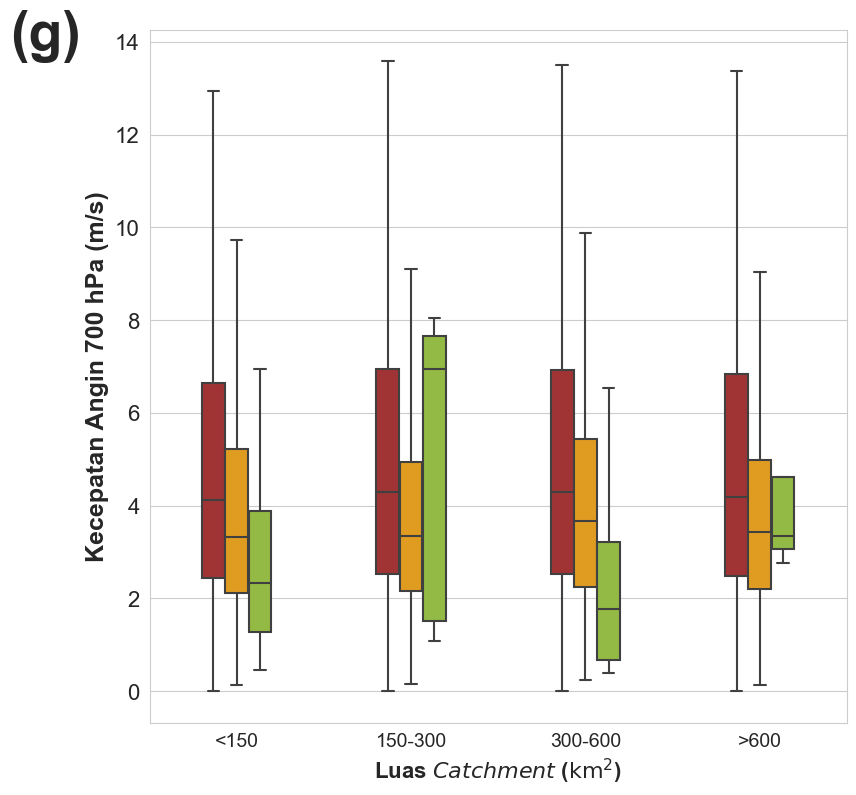

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "All"
data_All = concat_ws[concat_ws["Kategori"] == "All"]

# Filter data for category "P"
data_P = concat_ws[concat_ws["Kategori"] == "P"]

# Filter data for category "FF"
data_FF = concat_ws[concat_ws["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF['Luas_Category'] = pd.cut(data_FF['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined = pd.concat([data_All, data_P, data_FF])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(9, 9))
bx_ws = sns.boxplot(x='Luas_Category', y='Windspeed', hue='Kategori', data=data_combined,
                      palette={"All": "firebrick", "P": "orange", "FF": "yellowgreen"}, width=0.4, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2},
                      showfliers=False)

# Set labels and title
plt.xlabel("Luas $\mathrm{\it{Catchment}}$ ($\mathrm{km}^2$)", size=16, fontweight='bold')
plt.ylabel("Kecepatan Angin 700 hPa (m/s)", size=18, fontweight='bold')
# plt.title("Boxplot Luas Area Terhadap Parameter Kecepatan Angin", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(g)', xy=(-0.20, 0.97), xycoords='axes fraction', fontsize=40, fontweight='bold')

plt.xticks(fontsize=14)
bx_ws.set_yticklabels(bx_ws.get_yticklabels(), fontsize=16)

# Remove the legend
bx_ws.legend_.remove()

# Show the plot
plt.show()


In [37]:
print('Gabung Data WS')
centroid_lat = titik_centroid['Latitude'].values
centroid_lon = titik_centroid['Longitude'].values
centroid_luas = titik_centroid['Luas'].values

lls_lat = lls_data['latitude'].values
lls_lon = lls_data['longitude'].values

def find_idx(base, goal):
    idx = []
    for i in goal:
        idx.append(np.argmin(abs(base-i)))
    return idx

# Mencari index lat lon centroid di data cape
idx_lat = find_idx(lls_lat, centroid_lat)
idx_lon = find_idx(lls_lon, centroid_lon)

gabung_lls = np.array([])  # Data gabungan
luas_counter = 0  # Counter for Luas values

for n in range(len(idx_lat)):
    gabung_lls = np.append(gabung_lls, lls_data[:, idx_lat[n], idx_lon[n]])

    # Check if 96432 records have been added, then update Luas value
    if (n+1) % 96432 == 0:
        luas_counter += 1

# Create a Luas column with repeated values based on the luas_counter
luas_values = np.repeat(centroid_luas, 96432)
df_gabung_lls = pd.DataFrame({'LLS': gabung_lls, 'Luas': luas_values})

# Add a Kategori column with "All" values
df_gabung_lls['Kategori'] = 'All'

# Display the updated DataFrame
print(df_gabung_lls)

Gabung Data WS
              LLS        Luas Kategori
0        2.382901  130.325204      All
1        1.780548  130.325204      All
2        1.237046  130.325204      All
3        1.148391  130.325204      All
4        1.175338  130.325204      All
...           ...         ...      ...
8968171  4.738345   73.063062      All
8968172  4.884814   73.063062      All
8968173  5.099519   73.063062      All
8968174  2.796241   73.063062      All
8968175  2.305917   73.063062      All

[8968176 rows x 3 columns]


In [38]:
concat_lls = pd.concat([df_gabung_lls,boxplot_lls])
concat_lls

,LLS,Luas,Kategori
0,2.382901,130.325204,All
1,1.780548,130.325204,All
2,1.237046,130.325204,All
3,1.148391,130.325204,All
4,1.175338,130.325204,All
...,...,...,...
3399,3.394720,746.181453,FF
3400,2.385413,816.309189,FF
3401,0.995052,185.956882,FF
3402,3.918952,267.451392,FF


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\1183322659.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\1183322659.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '3

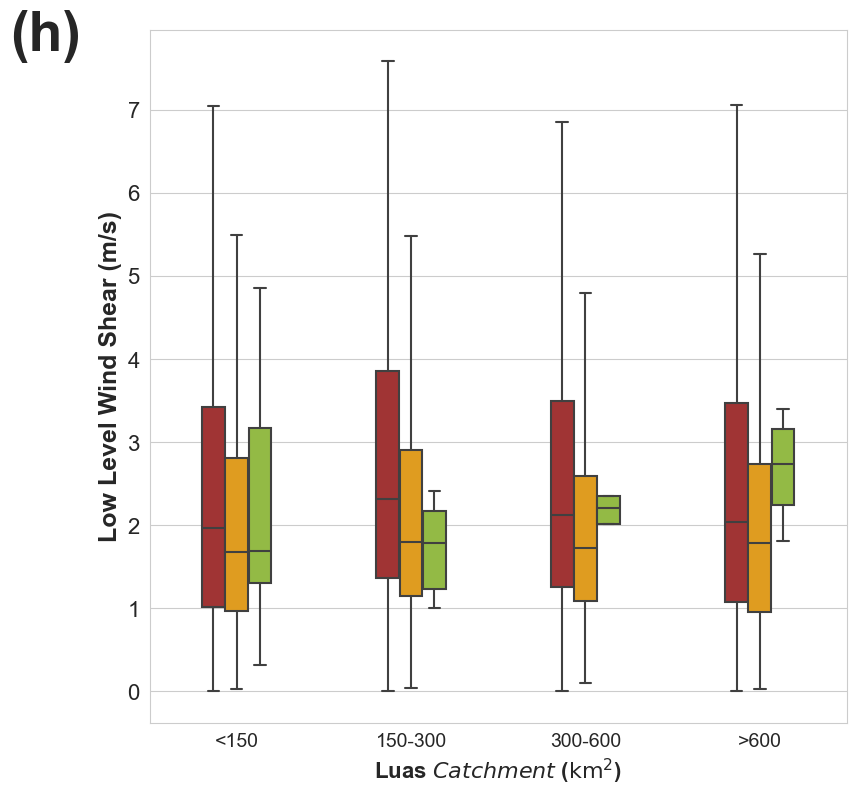

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "All"
data_All = concat_lls[concat_lls["Kategori"] == "All"]

# Filter data for category "P"
data_P = concat_lls[concat_lls["Kategori"] == "P"]

# Filter data for category "FF"
data_FF = concat_lls[concat_lls["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF['Luas_Category'] = pd.cut(data_FF['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined = pd.concat([data_All, data_P, data_FF])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(9, 9))
bx_lls = sns.boxplot(x='Luas_Category', y='LLS', hue='Kategori', data=data_combined,
                      palette={"All": "firebrick", "P": "orange", "FF": "yellowgreen"}, width=0.4, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2},
                      showfliers=False)

# Set labels and title
plt.xlabel("Luas $\mathrm{\it{Catchment}}$ ($\mathrm{km}^2$)", size=16, fontweight='bold')
plt.ylabel("Low Level Wind Shear (m/s)", size=18, fontweight='bold')
# plt.title("Boxplot Luas Area Terhadap Parameter Low Level Wind Shear", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(h)', xy=(-0.20, 0.97), xycoords='axes fraction', fontsize=40, fontweight='bold')

plt.xticks(fontsize=14)
bx_lls.set_yticklabels(bx_lls.get_yticklabels(), fontsize=16)

# Remove the legend
bx_lls.legend_.remove()

# Show the plot
plt.show()


In [40]:
print('Gabung Data WS')
centroid_lat = titik_centroid['Latitude'].values
centroid_lon = titik_centroid['Longitude'].values
centroid_luas = titik_centroid['Luas'].values

dls_lat = dls_data['latitude'].values
dls_lon = dls_data['longitude'].values

def find_idx(base, goal):
    idx = []
    for i in goal:
        idx.append(np.argmin(abs(base-i)))
    return idx

# Mencari index lat lon centroid di data cape
idx_lat = find_idx(dls_lat, centroid_lat)
idx_lon = find_idx(dls_lon, centroid_lon)

gabung_dls = np.array([])  # Data gabungan
luas_counter = 0  # Counter for Luas values

for n in range(len(idx_lat)):
    gabung_dls = np.append(gabung_dls, dls_data[:, idx_lat[n], idx_lon[n]])

    # Check if 96432 records have been added, then update Luas value
    if (n+1) % 96432 == 0:
        luas_counter += 1

# Create a Luas column with repeated values based on the luas_counter
luas_values = np.repeat(centroid_luas, 96432)
df_gabung_dls = pd.DataFrame({'DLS': gabung_dls, 'Luas': luas_values})

# Add a Kategori column with "All" values
df_gabung_dls['Kategori'] = 'All'

# Display the updated DataFrame
print(df_gabung_dls)

Gabung Data WS
              DLS        Luas Kategori
0        8.717555  130.325204      All
1        8.067392  130.325204      All
2        7.337233  130.325204      All
3        6.870492  130.325204      All
4        6.165505  130.325204      All
...           ...         ...      ...
8968171  5.271521   73.063062      All
8968172  4.955422   73.063062      All
8968173  4.565859   73.063062      All
8968174  6.358125   73.063062      All
8968175  6.035661   73.063062      All

[8968176 rows x 3 columns]


In [41]:
concat_dls = pd.concat([df_gabung_dls,boxplot_dls])
concat_dls

,DLS,Luas,Kategori
0,8.717555,130.325204,All
1,8.067392,130.325204,All
2,7.337233,130.325204,All
3,6.870492,130.325204,All
4,6.165505,130.325204,All
...,...,...,...
3399,6.927495,746.181453,FF
3400,2.190584,816.309189,FF
3401,4.604455,185.956882,FF
3402,6.901704,267.451392,FF


C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\3165233474.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
C:\Users\Nurul Nabila Fadiyah\AppData\Local\Temp\ipykernel_8064\3165233474.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '3

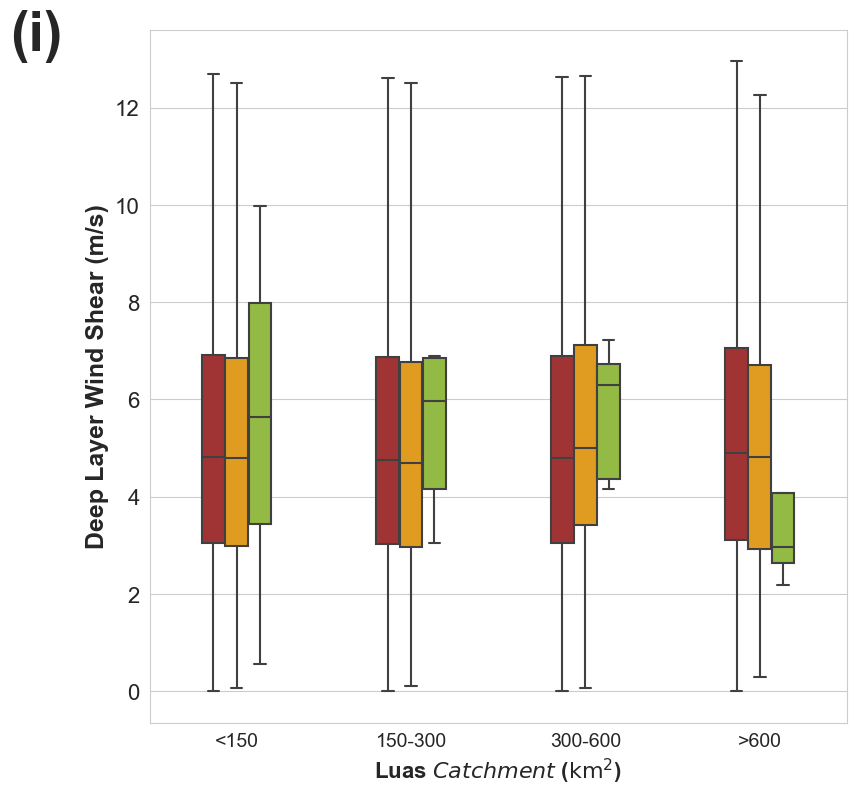

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for category "All"
data_All = concat_dls[concat_dls["Kategori"] == "All"]

# Filter data for category "P"
data_P = concat_dls[concat_dls["Kategori"] == "P"]

# Filter data for category "FF"
data_FF = concat_dls[concat_dls["Kategori"] == "FF"]

# Create a new column "Luas_Category" based on "Luas" values for both subsets
data_All['Luas_Category'] = pd.cut(data_All['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_P['Luas_Category'] = pd.cut(data_P['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])
data_FF['Luas_Category'] = pd.cut(data_FF['Luas'], bins=[0, 150, 300, 600, float('inf')], labels=['<150', '150-300', '300-600', '>600'])

# Combine the two subsets
data_combined = pd.concat([data_All, data_P, data_FF])

# Create the boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(9, 9))
bx_dls = sns.boxplot(x='Luas_Category', y='DLS', hue='Kategori', data=data_combined,
                      palette={"All": "firebrick", "P": "orange", "FF": "yellowgreen"}, width=0.4, order=['<150', '150-300', '300-600', '>600'],
                      flierprops={'marker': 'D', 'markerfacecolor': 'grey', 'markersize': 5, 'markeredgecolor': 'grey', 'markeredgewidth': 0.2},
                      showfliers=False)

# Set labels and title
plt.xlabel("Luas $\mathrm{\it{Catchment}}$ ($\mathrm{km}^2$)", size=16, fontweight='bold')
plt.ylabel("Deep Layer Wind Shear (m/s)", size=18, fontweight='bold')
# plt.title("Boxplot Luas Area Terhadap Parameter Deep Layer Wind Shear", size=17)

# Annotate 'a' in the top-left corner
plt.annotate('(i)', xy=(-0.20, 0.97), xycoords='axes fraction', fontsize=40, fontweight='bold')

plt.xticks(fontsize=14)
bx_dls.set_yticklabels(bx_dls.get_yticklabels(), fontsize=16)

# Remove the legend
bx_dls.legend_.remove()

# Show the plot
plt.show()


In [43]:
# Initialize an empty DataFrame
percen_all = pd.DataFrame()

# Calculate percentiles
percentiles_all_cape = bx_cape.quantile([0, 0.25, 0.5, 0.75, 1])
percentiles_all_cin = bx_cin.quantile([0, 0.25, 0.5, 0.75, 1])
percentiles_all_kindex = bx_kindex.quantile([0, 0.25, 0.5, 0.75, 1])
percentiles_all_tcwv = bx_tcwv.quantile([0, 0.25, 0.5, 0.75, 1])
percentiles_all_sh = bx_sh.quantile([0, 0.25, 0.5, 0.75, 1])
percentiles_all_rh = bx_rh.quantile([0, 0.25, 0.5, 0.75, 1])
percentiles_all_ws = bx_ws.quantile([0, 0.25, 0.5, 0.75, 1])
percentiles_all_lls = bx_lls.quantile([0, 0.25, 0.5, 0.75, 1])
percentiles_all_dls = bx_dls.quantile([0, 0.25, 0.5, 0.75, 1])

CAPE = []
CIN = []
Kindex = []
TCWV =[]
Specific_Humidity = []
Relative_Humidity = []
Windspeed = []
LLS = []
DLS = []
#################################
percen_all['CAPE'] = percentiles_all_cape
percen_all['CIN'] = percentiles_all_cin
percen_all['Kindex'] = percentiles_all_kindex
percen_all['TCWV'] = percentiles_all_tcwv
percen_all['Specific_Humidity'] = percentiles_all_sh
percen_all['Relative_Humidity'] = percentiles_all_rh
percen_all['Windspeed'] = percentiles_all_ws
percen_all['LLS'] = percentiles_all_lls
percen_all['DLS'] = percentiles_all_dls
percen_all.T

AttributeError: 'Axes' object has no attribute 'quantile'